Import package

In [30]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk

Raw Data

In [22]:
text = [
    'Ada motor ada sepeda .',
    'Semuanya beroda dua .',
    'Indonesia kaya budaya .',
    'Sepatutnya kita menjaganya Ada pisang ada semangka .',
    'Jika dimakan manis rasanya .',
    'Indonesia ragam budaya .',
    'Tugas kita tuk menjaganya Ada rusa ada buaya .',
    'Sungguh hitam warna matanya .',
    'Ada adat seribu bahasa .',
    'Kita wajib menghormatinya Alat timbang pucuknya patah .'
]


function to transfor raw data to corpus structure and remove unnecessary characters

In [23]:
def transform_to_corpus(string_list):
    corpus = []
    for string in string_list:
        words = re.findall(r'\b\w+\b', string)
        if words:
            corpus.append(words)
    return corpus

corpus = transform_to_corpus(text)

print(corpus)

[['Ada', 'motor', 'ada', 'sepeda'], ['Semuanya', 'beroda', 'dua'], ['Indonesia', 'kaya', 'budaya'], ['Sepatutnya', 'kita', 'menjaganya', 'Ada', 'pisang', 'ada', 'semangka'], ['Jika', 'dimakan', 'manis', 'rasanya'], ['Indonesia', 'ragam', 'budaya'], ['Tugas', 'kita', 'tuk', 'menjaganya', 'Ada', 'rusa', 'ada', 'buaya'], ['Sungguh', 'hitam', 'warna', 'matanya'], ['Ada', 'adat', 'seribu', 'bahasa'], ['Kita', 'wajib', 'menghormatinya', 'Alat', 'timbang', 'pucuknya', 'patah']]


lowering every tokens

In [28]:
corpus = [[word.lower() for word in sublist] for sublist in corpus]
corpus

[['ada', 'motor', 'ada', 'sepeda'],
 ['semuanya', 'beroda', 'dua'],
 ['indonesia', 'kaya', 'budaya'],
 ['sepatutnya', 'kita', 'menjaganya', 'ada', 'pisang', 'ada', 'semangka'],
 ['jika', 'dimakan', 'manis', 'rasanya'],
 ['indonesia', 'ragam', 'budaya'],
 ['tugas', 'kita', 'tuk', 'menjaganya', 'ada', 'rusa', 'ada', 'buaya'],
 ['sungguh', 'hitam', 'warna', 'matanya'],
 ['ada', 'adat', 'seribu', 'bahasa'],
 ['kita', 'wajib', 'menghormatinya', 'alat', 'timbang', 'pucuknya', 'patah']]

In [35]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


stopword removing

In [39]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def remove_stopword(words):
    factory = StopWordRemoverFactory()
    stopword_remover = factory.create_stop_word_remover()
    processed_words = [stopword_remover.remove(word) for word in words]
    return processed_words

corpus = [remove_stopword(sublist) for sublist in corpus]
corpus = [[word for word in sublist if word != ''] for sublist in corpus]
corpus

[['motor', 'sepeda'],
 ['semuanya', 'beroda'],
 ['indonesia', 'kaya', 'budaya'],
 ['sepatutnya', 'menjaganya', 'pisang', 'semangka'],
 ['dimakan', 'manis', 'rasanya'],
 ['indonesia', 'ragam', 'budaya'],
 ['tugas', 'tuk', 'menjaganya', 'rusa', 'buaya'],
 ['sungguh', 'hitam', 'warna', 'matanya'],
 ['adat', 'seribu', 'bahasa'],
 ['wajib', 'menghormatinya', 'alat', 'timbang', 'pucuknya', 'patah']]

In [40]:
model_w2v = Word2Vec(sentences=corpus, vector_size=10, window=5, min_count=1, workers=4)

In [41]:
model_w2v

In [42]:
words = list(model_w2v.wv.index_to_key)
vector_W2V = [model_w2v.wv[word] for word in words]
vector_W2V = np.array(vector_W2V)

In [43]:
words

['indonesia',
 'budaya',
 'menjaganya',
 'patah',
 'pucuknya',
 'sepeda',
 'semuanya',
 'beroda',
 'kaya',
 'sepatutnya',
 'pisang',
 'semangka',
 'dimakan',
 'manis',
 'rasanya',
 'ragam',
 'tugas',
 'tuk',
 'rusa',
 'buaya',
 'sungguh',
 'hitam',
 'warna',
 'matanya',
 'adat',
 'seribu',
 'bahasa',
 'wajib',
 'menghormatinya',
 'alat',
 'timbang',
 'motor']

In [44]:
vector_W2V

array([[-5.3622723e-03,  2.3643137e-03,  5.1033497e-02,  9.0092734e-02,
        -9.3029499e-02, -7.1168087e-02,  6.4588726e-02,  8.9729883e-02,
        -5.0154280e-02, -3.7633717e-02],
       [ 7.3811889e-02, -1.5337008e-02, -4.5370121e-02,  6.5538444e-02,
        -4.8594598e-02, -1.8146377e-02,  2.8773749e-02,  9.9300276e-03,
        -8.2846411e-02, -9.4481066e-02],
       [ 7.3108770e-02,  5.0705835e-02,  6.7583300e-02,  7.6220548e-03,
         6.3515656e-02, -3.4050256e-02, -9.4667207e-03,  5.7681680e-02,
        -7.5213328e-02, -3.9365184e-02],
       [-7.5139269e-02, -9.2879673e-03,  9.5395081e-02, -7.3205486e-02,
        -2.3334308e-02, -1.9386388e-02,  8.0790475e-02, -5.9307456e-02,
         4.6071823e-04, -4.7555588e-02],
       [-9.6064799e-02,  5.0077636e-02, -8.7604351e-02, -4.3930147e-02,
        -3.5376460e-04, -2.9638361e-03, -7.6606788e-02,  9.6149452e-02,
         4.9843643e-02,  9.2330448e-02],
       [-8.1579171e-02,  4.4957984e-02, -4.1370761e-02,  8.2453610e-03,
   

In [45]:
tsne = TSNE(n_components=2, perplexity=min(5, len(vector_W2V)-1), random_state=42)
vectors_tsne = tsne.fit_transform(vector_W2V)

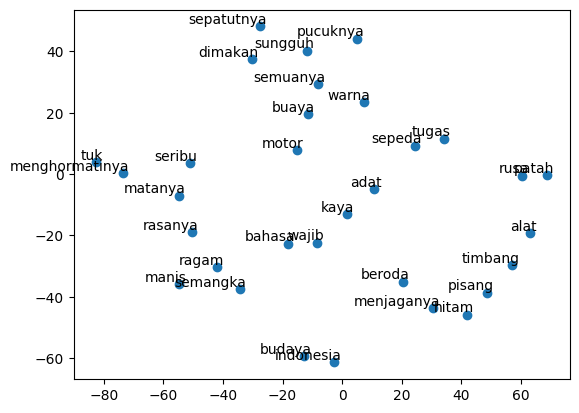

In [46]:
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right')

plt.show()

Gensim Fasttext

In [47]:
from gensim.models import FastText

model_fasttext = FastText(sentences=corpus, vector_size=10, window=5, min_count=1, workers=4)

In [48]:
words = list(model_fasttext.wv.index_to_key)
vector_fasttext = [model_fasttext.wv[word] for word in words]
vector_fasttext = np.array(vector_fasttext)

In [49]:
words

['indonesia',
 'budaya',
 'menjaganya',
 'patah',
 'pucuknya',
 'sepeda',
 'semuanya',
 'beroda',
 'kaya',
 'sepatutnya',
 'pisang',
 'semangka',
 'dimakan',
 'manis',
 'rasanya',
 'ragam',
 'tugas',
 'tuk',
 'rusa',
 'buaya',
 'sungguh',
 'hitam',
 'warna',
 'matanya',
 'adat',
 'seribu',
 'bahasa',
 'wajib',
 'menghormatinya',
 'alat',
 'timbang',
 'motor']

In [50]:
vector_fasttext

array([[ 3.75491031e-03,  6.68148044e-03, -3.26956064e-03,
         7.26378337e-03, -1.23696262e-02,  5.07123768e-03,
        -1.04443892e-03,  1.73091944e-02,  6.13545207e-03,
         1.10297231e-02],
       [-7.86453660e-04,  6.46338472e-03,  2.03660633e-02,
         1.96664780e-03, -1.16468500e-02, -7.74370201e-05,
         2.30525099e-02,  1.27276620e-02, -2.69063357e-02,
        -6.94657303e-03],
       [-4.09018388e-03,  4.78945207e-03, -1.39824382e-03,
         2.71424814e-03,  1.26748104e-02, -2.51462008e-03,
         1.77281757e-03,  2.78817932e-03, -3.38350213e-03,
         1.59839783e-02],
       [-1.74517685e-03, -1.76750161e-02,  3.94510739e-02,
        -3.29667293e-02, -8.66148341e-03,  8.10102560e-03,
        -1.59994084e-02,  7.75639713e-03,  3.71994786e-02,
         1.74252819e-02],
       [ 6.39710948e-03, -1.10515272e-02, -4.40999307e-03,
         1.39152529e-02,  3.25298309e-03, -1.02937198e-03,
        -8.87214579e-03,  1.57666579e-02, -1.06565376e-05,
        -1.

In [51]:
tsne = TSNE(n_components=2, perplexity=min(5, len(vector_fasttext)-1), random_state=42)
vectors_tsne = tsne.fit_transform(vector_fasttext)

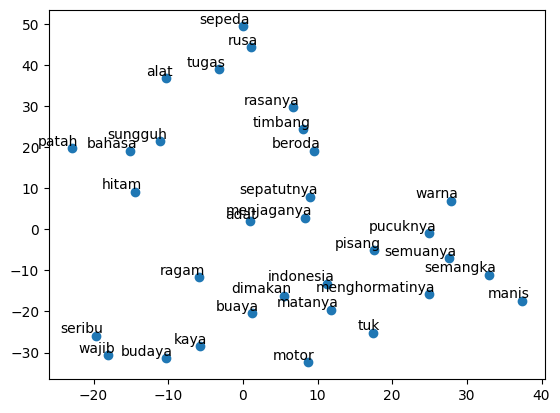

In [52]:
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right')

plt.show()

In [53]:
# representasi kata motor
word_w2v = model_w2v.wv['motor']
word_fasttext = model_fasttext.wv['motor']

print("Word2Vec:", word_w2v)
print("FastText:", word_fasttext)

Word2Vec: [ 0.09382351  0.04671808  0.03966121 -0.06243505  0.08459979 -0.02150165
  0.08825187 -0.05362003 -0.08129419  0.06824559]
FastText: [ 0.01284685  0.00889097  0.00564807 -0.00867674 -0.00575647 -0.00353128
 -0.01101921 -0.02086665 -0.02400226  0.02458893]


In [55]:
# Gunakan model Word2Vec atau FastText yang telah dilatih
similar_words_w2v = model_w2v.wv.most_similar('sepeda', topn=4)
similar_words_fasttext = model_fasttext.wv.most_similar('sepeda', topn=4)

print(f"Word2Vec - Kata serupa dengan 'sepeda':{similar_words_w2v}")
print(f"FastText - Kata serupa dengan 'sepeda':{similar_words_fasttext}")

Word2Vec - Kata serupa dengan 'hitam':[('tugas', 0.5916513800621033), ('warna', 0.5115841627120972), ('adat', 0.4619218111038208), ('motor', 0.4242832064628601)]
FastText - Kata serupa dengan 'hitam':[('rusa', 0.739611029624939), ('tugas', 0.5995570421218872), ('sepatutnya', 0.322677344083786), ('warna', 0.2686302363872528)]


berdasarkan hasil model w2vec dan fasttext yang telah dilatih, dirasa kedua model tersebut belum melakukan kinerja yang baik. hal tersebut dikarenakan saat melakukan pencarian kata yang mirip masih terdapat beberapa kata yang tidak relevan. hal ini dapat terjadi karena data yang kita latih masih sangat sedikit sehingga akurasi prediksi dari model model tersebut masih kurang baik.  

tetapi jika ingin dilakukan komparasi dari kedua model tersebut, akurasi dari model word2vec lebih baik daripada fasttext. setelah dilakukan percobaan pencarian kata yang mirip dengan kata 'sepeda', model word2vec memberikan 1 output kata yang relevan yaitu 'motor'. sedangkan model fasttext tidak memberikan satupun output yang relevan.